<a href="https://colab.research.google.com/github/Mushrifah/Thermal_project/blob/master/thermal_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [11]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!ls

gdrive	sample_data


In [0]:
#/content/gdrive/My Drive/test1.zip

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import io


import zipfile
#https://drive.google.com/open?id=1uKs1nz3GBYv3VxwKcxecsCWmMrVFtkVc
file_id="1uKs1nz3GBYv3VxwKcxecsCWmMrVFtkVc"
downloaded=drive.CreateFile({'id':file_id})
downloaded.GetContentFile('test2.zip')
!unzip test2.zip


Archive:  test2.zip
   creating: test1/non-stress/
  inflating: test1/non-stress/img_thermal_1571284848126.jpg  
  inflating: test1/non-stress/img_thermal_1571284848386.jpg  
  inflating: test1/non-stress/img_thermal_1571284851557.jpg  
  inflating: test1/non-stress/img_thermal_1571284851804.jpg  
  inflating: test1/non-stress/img_thermal_1571284854191.jpg  
  inflating: test1/non-stress/img_thermal_1571284902650.jpg  
  inflating: test1/non-stress/img_thermal_1571284903275.jpg  
  inflating: test1/non-stress/img_thermal_1571284903901.jpg  
  inflating: test1/non-stress/img_thermal_1571284904119.jpg  
  inflating: test1/non-stress/img_thermal_1571284914842.jpg  
  inflating: test1/non-stress/img_thermal_1571284915340.jpg  
  inflating: test1/non-stress/img_thermal_1571284915853.jpg  
  inflating: test1/non-stress/img_thermal_1571284922553.jpg  
  inflating: test1/non-stress/img_thermal_1571284922833.jpg  
  inflating: test1/non-stress/img_thermal_1571284924384.jpg  
  inflating: test1/

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/test1'

In [4]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  2 classes:
 ['stress', 'non-stress']


In [5]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: stress


Class: non-stress


In [6]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )


There are 322 training images and 80 validation images.


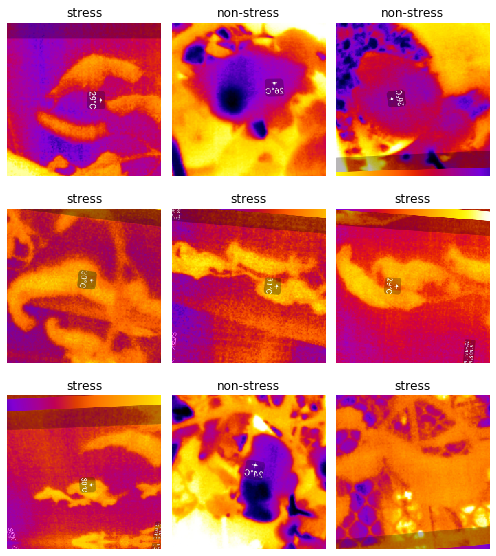

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 281MB/s]


In [9]:

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.853595,0.487050,0.850000,00:19
1,0.527897,0.255069,0.912500,00:19
2,0.401842,0.208817,0.937500,00:18
3,0.310205,0.161192,0.937500,00:18


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

In [39]:
img = learn.data.train_ds[0][0]
learn.predict(img)


(Category stress, tensor(1), tensor([1.9945e-06, 1.0000e+00]))

In [0]:
learn.export()


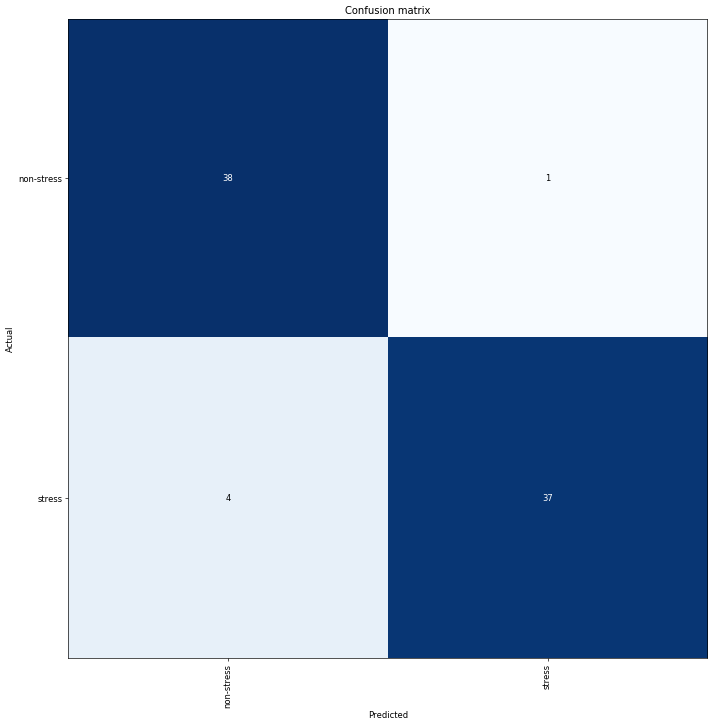

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

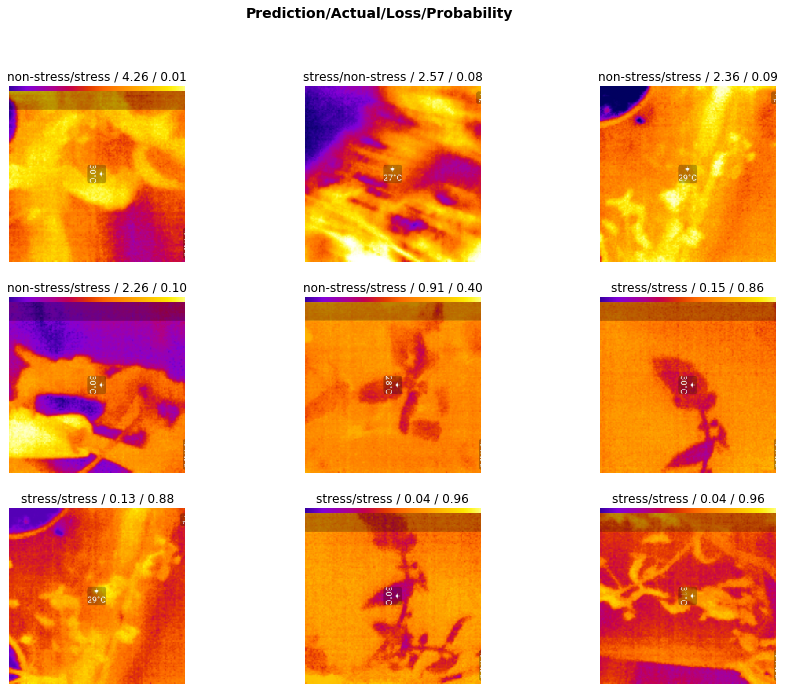

In [12]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [44]:
path = '/content/drive/My Drive/best' #The path of your test image
ata  = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:247: UserWarning: Your training dataloader is empty, you have only 4 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


It is a stress


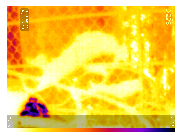

In [52]:
img = open_image(get_image_files(path)[0])
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("It is a", pred_class)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
